In [86]:
import numpy as np

import subprocess
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def saveplot(path:str, title:str, xname:str, yname:str, ax) -> None:
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='silver')
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(xname) 
    plt.ylabel(yname)
    plt.title(title)
    plt.legend()
    plt.savefig(f"{path}.eps", format='eps')
    plt.savefig(f"{path}.png", format='png')

In [120]:
# arguments
benchmark_binary = "../build/benchmarks"

tries = ["array"]

filespath="../resources/geschud/"
files = [(filespath + filepath, os.stat(filespath + filepath).st_size) for filepath in os.listdir(filespath)]
files.sort(key=lambda x:(x[1], x[0]))

operations = ["add", "search", "remove"]

# Run benchmarks
results = []
for trie in tries:
    oper_results = []
    for i_oper, oper in enumerate(operations):
        file_results = []
        for (filename, filelen) in files:
            args = [benchmark_binary, f"{trie}", f"{filename}", f"{i_oper + 1}"]
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()
            result = int(popen.stdout.read())
            # print(f"{filename:40} {trie:12} {result/10e9:20}")
            file_results.append((filename, filelen, result))
        oper_results.append((oper, file_results))
    results.append((trie, oper_results))

print(results)

[('custom', [('add', [('../resources/geschud/geschud_piepklein.g6', 87997, 2210701), ('../resources/geschud/geschud_klein.g6', 882877, 13183564), ('../resources/geschud/geschud_middelmaat.g6', 8848913, 203270802), ('../resources/geschud/geschud_groot.g6', 44182717, 10275524277), ('../resources/geschud/geschud_heelgroot.g6', 88348067, 20858094338), ('../resources/geschud/geschud.g6', 154089149, 50358773850)]), ('search', [('../resources/geschud/geschud_piepklein.g6', 87997, 1737991), ('../resources/geschud/geschud_klein.g6', 882877, 10417986), ('../resources/geschud/geschud_middelmaat.g6', 8848913, 187544712), ('../resources/geschud/geschud_groot.g6', 44182717, 10250396646), ('../resources/geschud/geschud_heelgroot.g6', 88348067, 29799480653), ('../resources/geschud/geschud.g6', 154089149, 50365433666)]), ('remove', [('../resources/geschud/geschud_piepklein.g6', 87997, 243283), ('../resources/geschud/geschud_klein.g6', 882877, 4339276), ('../resources/geschud/geschud_middelmaat.g6', 884

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


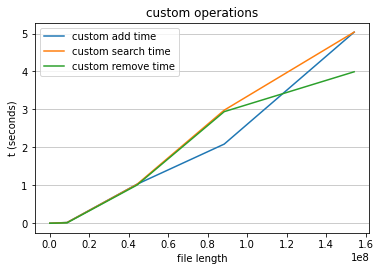

In [121]:
for trie, trie_results in results:
    fig,ax = plt.subplots()
    for oper,oper_result in results[0][1]:
        n,x,y = [np.array(e) for e in list(zip(*(oper_result)))]
        y = y/10e9
        plt.plot(x, y, label=f"{trie} {oper} time")
    saveplot(f"images/{trie}_all", f"{trie} operations", "file length", "t (seconds)", ax)
    plt.show()